# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor#.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().values.any()

False

In [5]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
(pd.infer_freq(pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751,), warn=True))

'S'

In [8]:
# Your code here:
time_series_index = pd.Series(pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751))
time_series_index

0      2018-01-01 00:00:00
1      2018-01-01 00:00:01
2      2018-01-01 00:00:02
3      2018-01-01 00:00:03
4      2018-01-01 00:00:04
               ...        
1746   2018-01-01 00:29:06
1747   2018-01-01 00:29:07
1748   2018-01-01 00:29:08
1749   2018-01-01 00:29:09
1750   2018-01-01 00:29:10
Length: 1751, dtype: datetime64[ns]

Assign the time series index to the dataframe's index.

In [9]:
# Your code here:
sensor = sensor.set_index(time_series_index).asfreq('S')
print(sensor.index)
sensor.head()

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [10]:
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [11]:
def decomposed_plots(dfcol, freq = ""):
    import statsmodels.api as sm
    ts_log = np.log(dfcol)
    decomposition = sm.tsa.seasonal_decompose(dfcol, period=freq)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(15,10))
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    return plt.show()

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


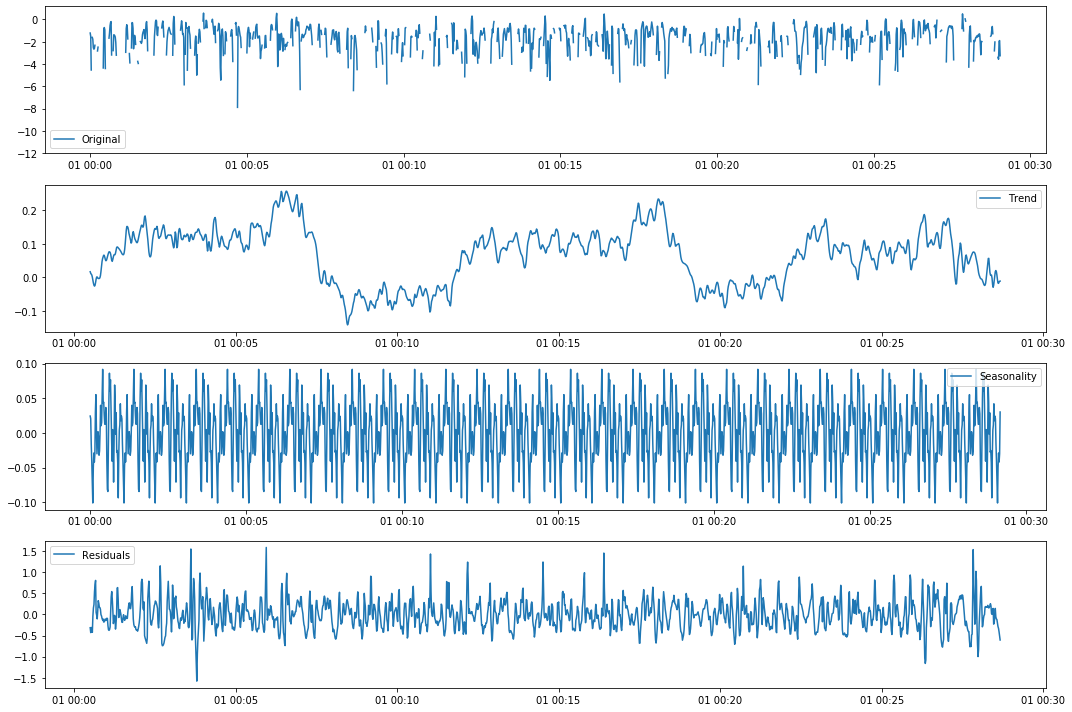

In [12]:
decomposed_plots(sensor['userAcceleration.x'], freq = 60)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

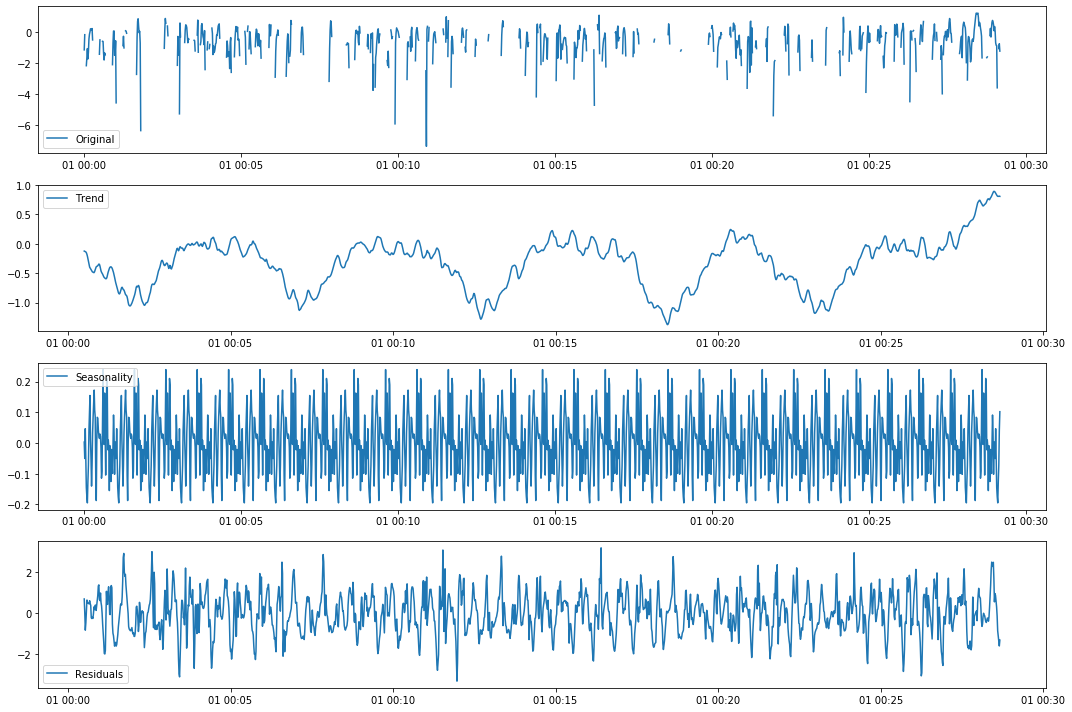

In [13]:
decomposed_plots(sensor['rotationRate.x'], freq = 60)

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
# Your code here:


def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    # Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()    
    rolmean = timeseries.rolling(12).mean()


    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)


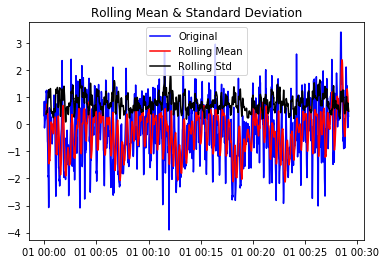

Results of Dickey-Fuller Test:
Test Statistic                   -5.269861
p-value                           0.000006
#Lags Used                       25.000000
Number of Observations Used    1725.000000
Critical Value (1%)              -3.434147
Critical Value (5%)              -2.863217
Critical Value (10%)             -2.567663
dtype: float64


In [15]:
test_stationarity(sensor['rotationRate.x'])

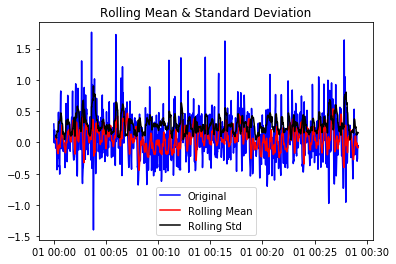

Results of Dickey-Fuller Test:
Test Statistic                -1.795799e+01
p-value                        2.823439e-30
#Lags Used                     4.000000e+00
Number of Observations Used    1.746000e+03
Critical Value (1%)           -3.434101e+00
Critical Value (5%)           -2.863197e+00
Critical Value (10%)          -2.567652e+00
dtype: float64


In [16]:
test_stationarity(sensor['userAcceleration.x'])

What are your conclusions from this test?

    H0 = TS is non-stationarity
    H1 = TS is stationarity

Dickey-Fuller Test states that if 'Tests Statistic' < 'Critical Value' we can reject the H0 and establish the series as stationarity

`sensor['rotationRate.x']` <br>
In the Results of Dickey-Fuller Test we see Test Statistic is -5.269861 which is lower than any of the Critical Values: 1% = -3.43; 5% = -2.86; 10% = -2.56.

In this case we will reject the H0 and say that our variable Rotation Rate X is Stationarity.

`sensor['userAcceleration.x']`<br>
In the Results of Dickey-Fuller Test we see Test Statistic is -1.795799e+01 which is lower than any of the Critical Values: 1% = -3.434101e+00; 5% = -2.863197e+00; 10% = -2.567652e+00.

In this case we will reject the H0 and say that our variable User Acceleration is Stationarity.
